# P5


In [2]:
import pandas as pd
import numpy as np

import pickle

docs = pd.read_csv("QueryResults.csv")

In [3]:
docs.set_index('Id').sort_index()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount
Id,,,,,,,
4,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,759,64063,58,12
11,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,1612,188799,552,41
13,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,673,248432,157,27
19,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,341,63943,86,23
88,Is gettimeofday() guaranteed to be of microsec...,"<p>I am porting a game, that was originally wr...",<linux><winapi><visual-c++><unix><timer>,104,43767,19,10
...,...,...,...,...,...,...,...
69729326,Endless sine generation in C,<p>I am working on a project which incorporate...,<c><performance><time><precision><trigonometry>,91,10074,25,12
69832748,"Error ""Error: A <Route> is only ever to be use...",<p>I am trying to use routing for the first ti...,<javascript><node.js><reactjs><frameworks><rea...,57,77406,13,14
69875125,find_element_by_* commands are deprecated in s...,<p>When starting the function</p>\n<pre><code>...,<python><selenium><selenium-webdriver><webdriv...,52,59346,25,3


## Data Preparation


### Tags preprocessing

In [4]:
# one doc tags sample
docs['Tags'][0]

'<javascript><geolocation><projection><processing.js><proj4js>'

In [5]:
# tokenize the tags
def tokenizeTags(tags):
    """
    Remove some unwanted characters
    """
    tags = tags.replace('<', ' ')
    tags = tags.replace('>', '')
    return tags.strip()

docs['Tags'] = docs['Tags'].apply(tokenizeTags)

In [6]:
# format tag list
all_tags = str(docs['Tags'].values).split()
all_tags = ' '.join(map(str, docs['Tags'].values)).split()
# TODO WIP : faire l'analyse des tags pour le score des predictions

# multi binarize the tags
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([all_tags])

print(mlb.classes_)

# Test
# one doc tags sample
print(docs['Tags'][0])
tags_mlb = mlb.transform([docs['Tags'][0].split()])
print(tags_mlb)

# previous multiclass binarizer is very huge, instead filter directly where indexes equals '1'
for tag_index in np.where(tags_mlb == 1 )[1]:
    print(f'{tag_index} : {mlb.classes_[tag_index]}')
    

['.a' '.bash-profile' '.class-file' ... 'zune' 'zurb-foundation' 'zxing']
javascript geolocation projection processing.js proj4js
[[0 0 0 ... 0 0 0]]
4326 : geolocation
5652 : javascript
8395 : processing.js
8422 : proj4js
8431 : projection


In [7]:
tags_count = pd.DataFrame({'tags': mlb.classes_})
tags_count['count'] = ""
tags_count

,tags,count
0,.a,
1,.bash-profile,
2,.class-file,
3,.doc,
4,.htaccess,
...,...,...
12408,zsi,
12409,zstack,
12410,zune,
12411,zurb-foundation,


In [8]:
for i, tag in enumerate(tags_count['tags']):
    tags_count['count'].iloc[i] = all_tags.count(tag)

In [9]:
tags_count.sort_values('count', ascending=False)

,tags,count
5610,java,3054
8597,python,3025
5652,javascript,2695
1603,c#,2644
5449,ios,2391
...,...,...
5883,jxcore,1
5878,jvm-bytecode,1
5874,justify,1
5867,junit-runner,1


In [10]:
tags_count.describe()

,tags,count
count,12413,12413
unique,12413,238
top,.a,1
freq,1,5224


In [11]:
# select only the tags that appear more than 100 times, thus reducing the number of tags to approx. 200
# this produces our vocabulary for tagging
currated_tags = tags_count[tags_count['count'] >= 100]['tags'].to_list()
print(len(currated_tags))
currated_tags

191


['.net',
 'ajax',
 'algorithm',
 'amazon-web-services',
 'android',
 'android-layout',
 'android-studio',
 'angular',
 'angularjs',
 'animation',
 'apache',
 'apache-spark',
 'api',
 'arrays',
 'asp.net',
 'asp.net-core',
 'asp.net-mvc',
 'asp.net-mvc-3',
 'asp.net-mvc-4',
 'asp.net-web-api',
 'assembly',
 'async-await',
 'asynchronous',
 'audio',
 'authentication',
 'bash',
 'browser',
 'build',
 'c',
 'c#',
 'c++',
 'c++11',
 'caching',
 'class',
 'cocoa',
 'cocoa-touch',
 'command-line',
 'concurrency',
 'css',
 'csv',
 'data-structures',
 'database',
 'database-design',
 'dataframe',
 'date',
 'datetime',
 'debugging',
 'deep-learning',
 'dependency-injection',
 'design-patterns',
 'dictionary',
 'django',
 'docker',
 'eclipse',
 'entity-framework',
 'events',
 'exception',
 'express',
 'facebook',
 'file',
 'firebase',
 'forms',
 'function',
 'functional-programming',
 'gcc',
 'generics',
 'git',
 'github',
 'google-chrome',
 'gradle',
 'hash',
 'haskell',
 'hibernate',
 'html',
 

### Word Cloud

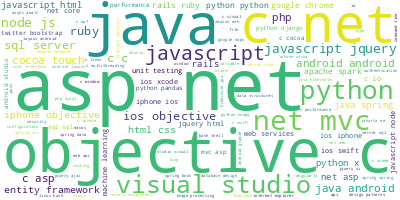

In [12]:
from wordcloud import WordCloud

long_string = ','.join(docs['Tags'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Words preprocessing

In [13]:
# WIP
# how to remove unwanted chars in the question body ?
import re

zero = docs.iloc[0]
re.sub('(<([^>]+)>)', '', zero.Body).replace('\n', '')


'I have this image. It\'s a map of the UK (not including Southern Ireland): I have successfully managed to get a latitude and longitude and plot it onto this map by taking the leftmost longitude and rightmost longitude of the UK and using them to work out where to put the point on the map.This is the code (for use in Processing.js but could be used as js or anything):// Size of the mapint width = 538;int height = 811;// X and Y boundariesfloat westLong = -8.166667;float eastLong = 1.762833;float northLat = 58.666667;float southLat = 49.95;void drawPoint(float latitude, float longitude){ fill(#000000); x = width * ((westLong-longitude)/(westLong-eastLong)); y = (height * ((northLat-latitude)/(northLat-southLat))); console.log(x + ", " + y); ellipseMode(RADIUS); ellipse(x, y, 2, 2);    }However, I haven\'t been able to implement a Mercator projection on these values. The plots are reasonably accurate but they are not good enough and this projection would solve it.I can\'t figure out how 

In [20]:
# english words corpus
import nltk.corpus

english_corpus = nltk.corpus.words
len(english_corpus.words())




236736

#### Remove code snippets

In [21]:
docs['Body'] = docs['Body'].apply(lambda d: d.replace('&lt;', '<').replace('&gt;', '>'))

In [22]:
from bs4 import BeautifulSoup

def remove_code_snippets(docs):
    """
    Remove code snippets from docs
    surrounded by <pre> tags
    """
    # ensure '<' & '>' chars are set, not the unicode char
    docs = docs.apply(lambda d: d.replace('&lt;', '<').replace('&gt;', '>'))
    ret = []
    for doc in docs:
        soup = BeautifulSoup(doc, 'html.parser')
        removals = soup.find_all('pre')
        for pre in removals:
            pre.decompose()
        ret.append(soup.get_text())
    return ret


In [23]:
docs['Body'] = remove_code_snippets(docs['Body'])

In [24]:
# words are the documents to use for the model
# words = docs['Body'].to_list()
words = docs['Body']

#### Remove Stop words, Lemmatize, Stemmize

In [25]:
# remove stop words
# lemmatize (convert and remove prefixes and suffixes to ignore the gender, plural, verb : walking, walks, walked, walk -> walk)
# and/or stemmize (take the same root of words : universe / university -> univers)

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(['p', 'gt', 'lt', 'li', 'ul', 'img', 'src', 'td', 'tr', 'table', 'div', 'code'])
filtre_stopw =  lambda text: [token.lower() for token in text if token.lower() not in stopwords]

from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')


# tokenize and remove stop words
def tokenize_sw_stem(doc):
	# nltk.word_tokenize(doc)
    filtered = filtre_stopw(tokenizer.tokenize(doc))
    ret = " ".join([stemmer.stem(s) for s in filtered] )
    return ret

def tokenize_sw_lem(doc):
    # nltk.word_tokenize(doc)
    filtered = filtre_stopw(tokenizer.tokenize(doc))
    ret = " ".join([lemmatizer.lemmatize(s) for s in filtered] )
    return ret


words_stem = list(map(tokenize_sw_stem, words))
words_lem = list(map(tokenize_sw_lem, words))
# words

In [26]:
words[543]

'I\'m trying to re-use a portion of my HTML view in multiple places.  The portion I want to re-use is table cells in an HTML table.  The problem is that my custom directive inside a ng-repeat is doing funny things.  I have reproduced the problem on jsFiddle.  There are two HTML tables in the jsFiddle.  The first is ng-repeat with the table cells written in the view and the second is the table cells coming from a directive, my-element.  Chrome dev tools report that the rendered HTML looks like this.  Note that the custom element appears only once and is outside the table.\nRendered HTML\n\nSource HTML\n\nSource JS\n\nPlease note the jsFiddle is a trivial example and common sense would lead to just not using directives at all.  However, my target code has a much larger template that I want to re-use.  I\'ve tried using "ng-include" as well but the result is similar.\n'

In [27]:
words_stem[543]

'tri use portion html view multipl place portion want use cell html problem custom direct insid ng repeat funni thing reproduc problem jsfiddl two html tabl jsfiddl first ng repeat cell written view second cell come direct element chrome dev tool report render html look like note custom element appear outsid render html sourc html sourc js pleas note jsfiddl trivial exampl common sens would lead use direct howev target much larger templat want use tri use ng includ well result similar'

In [28]:
words_lem[543]

'trying use portion html view multiple place portion want use cell html problem custom directive inside ng repeat funny thing reproduced problem jsfiddle two html table jsfiddle first ng repeat cell written view second cell coming directive element chrome dev tool report rendered html look like note custom element appears outside rendered html source html source j please note jsfiddle trivial example common sense would lead using directive however target much larger template want use tried using ng include well result similar'

#### Remove bad words


In [29]:

re.sub(r'[0-9]+', '', words_lem[4733])
# words tha contains underscores
re.sub(r'_+', '', words_lem[4733])
# words_lem[0]

'pretty sure possible pretty sure seen done think awesome gladly accept answer along line terrible idea  say basic struct want implement alias variable ideally third syntax would indistinguishable array sent arr reference parameter function expecting array float store data eg many opengl glget function would work fine think possible possible stupid'

In [30]:
import re

def remove_words(words):
    ret = []
    for word in words:
        # print(f'processing sentence: {word}\n')
        flat = re.sub(r'[0-9]+', '', word) # words that are numbers
        flat = re.sub(r'_+', '', flat) # words tha contains underscores
        flat = re.sub(r'\w{15,}', '', flat) # words longer than 15 chars are most probably code (i.e. myClass.myMethodName())
        
        # print(f'\ncurrated : {flat}')
        ret.append(flat)
    return ret


# re.sub(r'[0-9]*', '', words_lem[6543])
# re.sub(r'_+', '', words_lem[6543])
# currated = list(map(lambda x : re.sub(r'[0-9]*', '', x), words_lem))
currated = remove_words(words_lem)


In [31]:
currated[2649]


'working visualization project  dimensional continuous data kind thing could use study elevation data temperature pattern d map core really way flattening  dimension two dimension plus color particular field study actually working geographical elevation data good metaphor stick throughout post anyhow point continuous color renderer pleased gradient standard color wheel red pixel indicate coordinate high value violet pixel indicate low value underlying data structure us clever say interpolation algorithm enable arbitrarily deep zooming detail map point want draw topographical contour line using quadratic bezier curve able find good literature describing efficient algorithm finding curve give idea thinking poor man implementation renderer us black rgb value whenever encounter pixel intersects contour line several problem approach though area graph steeper slope result thinner often broken topo line ideally topo line continuous area graph flatter slope result wider topo line often entire 

In [32]:
words[2649]

'I\'ve been working on a visualization project for 2-dimensional continuous data. It\'s the kind of thing you could use to study elevation data or temperature patterns on a 2D map. At its core, it\'s really a way of flattening 3-dimensions into two-dimensions-plus-color. In my particular field of study, I\'m not actually working with geographical elevation data, but it\'s a good metaphor, so I\'ll stick with it throughout this post.\nAnyhow, at this point, I have a "continuous color" renderer that I\'m very pleased with:\n\nThe gradient is the standard color-wheel, where red pixels indicate coordinates with high values, and violet pixels indicate low values.\nThe underlying data structure uses some very clever (if I do say so myself) interpolation algorithms to enable arbitrarily deep zooming into the details of the map.\nAt this point, I want to draw some topographical contour lines (using quadratic bezier curves), but I haven\'t been able to find any good literature describing effici

#### Corpus size

In [33]:
# count the total number of words in the overall corpus
# needs to be limited to 2000 / 3000 words maximum
lem = map(lambda x : x.split(), currated)
flat_list = [word for sublist in list(lem) for word in sublist ]


In [34]:

# if assertion fails, means we need to reduce the number of words 
# -> add the number of stop words
unique_words = np.unique(flat_list)
print(unique_words.shape[0])
assert unique_words.shape[0] < 3000


43531


AssertionError: 

## Tf-Idf BOW

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(currated)
vectorizer.get_feature_names_out()
print(X.shape)
X = pd.DataFrame(X.T.todense())


(27128, 43444)


In [36]:
with open('vectorizer', 'wb') as v :
    pickle.dump(vectorizer, v)


In [37]:
vectorizer.vocabulary_

{'image': 17452,
 'map': 22176,
 'uk': 39617,
 'including': 17767,
 'southern': 35177,
 'ireland': 18806,
 'successfully': 36634,
 'managed': 22105,
 'get': 14742,
 'latitude': 20582,
 'longitude': 21637,
 'plot': 28313,
 'onto': 26350,
 'taking': 37300,
 'leftmost': 20792,
 'rightmost': 32120,
 'using': 40652,
 'work': 42378,
 'put': 29698,
 'point': 28408,
 'use': 40477,
 'processing': 29178,
 'could': 7495,
 'used': 40487,
 'anything': 1556,
 'however': 16798,
 'able': 94,
 'implement': 17613,
 'mercator': 22792,
 'projection': 29298,
 'value': 40787,
 'reasonably': 30647,
 'accurate': 262,
 'good': 15421,
 'enough': 11656,
 'would': 42441,
 'solve': 34956,
 'figure': 13105,
 'example': 12191,
 'find': 13264,
 'explaining': 12417,
 'whole': 42039,
 'world': 42419,
 'resource': 31716,
 'another': 1448,
 'extreme': 12550,
 'united': 39984,
 'kingdom': 20208,
 'got': 15473,
 'bounding': 4179,
 'box': 4194,
 'around': 2004,
 'also': 1127,
 'anyone': 1550,
 'help': 16360,
 'greatly': 156

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

def predict_tags(doc: str) -> list[str]:  
    tf1_new = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True,
                            max_features = 5000, vocabulary = vectorizer.vocabulary_)
    T = tf1_new.fit_transform(np.array([doc]))
    T = pd.DataFrame(T.T.todense())
    T[0].sort_values(ascending=False)
    # take the 3 most interesting keywords
    indexes = T[0].sort_values(ascending=False)[:5]
    # print(indexes)
    ret = []
    for i, val in indexes.items():
        # print(i)
        # print(indexes[0].index[i])
        if (val > 0): 
            ret.append(vectorizer.get_feature_names_out()[i])
            # print(vectorizer.get_feature_names_out()[i])
    return ret

#### Multi-label scoring

<https://medium.datadriveninvestor.com/predicting-tags-for-the-questions-in-stack-overflow-29438367261e>



In [39]:
index = 7541
X = words_lem[index]
y = docs['Tags'][index]
predict = predict_tags(np.array(words_lem[index]))
print(y.split())
# print(X)
print(predict)

# count number of label predicted found from expected
count = 0
for tag in predict:
    if tag in y.split():
        # print(f'found tag correctly predicted: {tag}')
        count += 1
print(count)



['c#', '.net', 'http', 'parallel-processing', 'download']
['download', 'file', 'chunk', 'session', 'implement']
1


compute the confusion matrix score for one prediction

In [40]:
# compute multilabel binarizer for tags scoring
from sklearn.metrics import multilabel_confusion_matrix

y_true = mlb.transform(y.split())
y_pred = mlb.transform(predict)

print(y_true.shape)
print(y_pred.shape)

# confusion matrix MCM
# MCM (0,0): TN
# MCM (1,0): FN
# MCM (1,1): TP
# MCM (0,1): FP
confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)
confusion_matrix[1602]

np.where(mlb.classes_ == 'download')[0]


(5, 12413)
(5, 12413)


/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/preprocessing/_label.py:870: UserWarning: unknown class(es) ['#', '-', '.', 'a', 'e', 'g', 'h', 'i', 'l', 'n', 'o', 'p', 't', 'w'] will be ignored
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/preprocessing/_label.py:870: UserWarning: unknown class(es) ['a', 'e', 'f', 'h', 'i', 'k', 'l', 'n', 'o', 'p', 't', 'u', 'w'] will be ignored
  warnings.warn(


array([3220])

#### Prediction

In [41]:
# sample code to predict tags

import pickle


tf1_new = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True,
                          max_features = 5000, vocabulary = vectorizer.vocabulary_)
T = tf1_new.fit_transform(np.array(["configuring java for accessing database with jdbc is not working with JPA after upgrade of spring 5.1. despite having modified application.properties"]))
T = pd.DataFrame(T.T.todense())

In [42]:
# T
T[0].sort_values(ascending=False)

6886     0.288675
42399    0.288675
35454    0.288675
211      0.288675
8365     0.288675
           ...   
14485    0.000000
14486    0.000000
14487    0.000000
14488    0.000000
43443    0.000000
Name: 0, Length: 43444, dtype: float64

In [43]:
# take the 3 most interesting keywords
indexes = T[0].sort_values(ascending=False)[:5]


In [44]:
print(indexes)
for i, val in indexes.items():
    # print(i)
    # print(indexes[0].index[i])
    if (val > 0): 
        print(vectorizer.get_feature_names_out()[i])

6886     0.288675
42399    0.288675
35454    0.288675
211      0.288675
8365     0.288675
Name: 0, dtype: float64
configuring
working
spring
accessing
database


In [49]:
# random index for testing
doc_n = 543
print(words[doc_n])
sorted = X[doc_n].sort_values(ascending=False)[:15]
print(sorted)
print(vectorizer.get_feature_names_out()[sorted.index[0]]) #take the higher tf-idf value in the list, and get its corresponding word
print(vectorizer.get_feature_names_out()[sorted.index[1]]) 
print(vectorizer.get_feature_names_out()[sorted.index[3]]) 

I'm trying to re-use a portion of my HTML view in multiple places.  The portion I want to re-use is table cells in an HTML table.  The problem is that my custom directive inside a ng-repeat is doing funny things.  I have reproduced the problem on jsFiddle.  There are two HTML tables in the jsFiddle.  The first is ng-repeat with the table cells written in the view and the second is the table cells coming from a directive, my-element.  Chrome dev tools report that the rendered HTML looks like this.  Note that the custom element appears only once and is outside the table.
Rendered HTML

Source HTML

Source JS

Please note the jsFiddle is a trivial example and common sense would lead to just not using directives at all.  However, my target code has a much larger template that I want to re-use.  I've tried using "ng-include" as well but the result is similar.

16851    0.369791
25077    0.340220
9766     0.321522
19711    0.312907
5214     0.277208
31432    0.213726
28558    0.213420
31371 

In [50]:
docs['Tags'][543]

'javascript html angularjs angularjs-directive angularjs-ng-repeat'

## Word2Vect

In [75]:
# snippet taken from sample notebook
import gensim
import multiprocessing

w2v_epochs=100
maxlen = 24 # adapt to length of sentences

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=5, window=5,
                                                vector_size=300,
                                                seed=42,
                                                # workers=30)
                                               workers=multiprocessing.cpu_count())
w2v_model.build_vocab(words_lem)
w2v_model.train(words, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")


Build & train Word2Vec model ...
Vocabulary size: 64
Word2Vec trained


In [18]:
with open('w2v_model', 'wb') as v :
    # pickle.dump(w2v_model, v)
    w2v_model.save(v)


In [19]:
# word2vect docs and tutorial at https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py
for index, word in enumerate(w2v_words):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_words)} is {word}")

word #0/290 is  
word #1/290 is e
word #2/290 is t
word #3/290 is o
word #4/290 is a
word #5/290 is i
word #6/290 is n
word #7/290 is r
word #8/290 is s
word #9/290 is l


à lire


topic modelling : unsupervised learning

topic classification : supervised learning


<https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/>

<https://www.baeldung.com/cs/ml-word2vec-topic-modeling>
